In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# The Middle Thirds Cantor Set

So, throughout this course, we will routinely return to a construct which underpins a lot of the stranger results in mathematics.  This construct is known as the _ Middle Thirds Cantor Set _.  The construction of this set is reasonable straightforward to explain.  Start with the interval 

$$
C_{0} = \left[0,1\right].  
$$

Note, I know _ interval _ usually means we use a variable like $I$, but just hang in there, you'll see where I'm going with this.  Now, with $C_{0}$ defined, we define the next interval $C_{1}$ to be 

$$
C_{1} = \left[0,\frac{1}{3}\right]\cup\left[\frac{2}{3},1\right].
$$

Thus, $C_{1}$ is just $C_{0}$ with the middle third removed.  We note that $C_{1}\subset C_{0}$, and thus $C_{1}=C_{1}\cap C_{0}$.  So now, all we do is keep repeating the process.  

![mtc](https://upload.wikimedia.org/wikipedia/commons/5/56/Cantor_set_in_seven_iterations.svg)

_ Problem _: Show that the Cantor set $\mathcal{C} = \cap_{j=0}^{\infty}C_{j}$ is closed and non-empty.

_ Problem _: Show that the length of the Cantor set vanishes.  

Now of course, what makes the Cantor set is not just that it is non-empty but that it has an _ uncountable _ number of points.  So understand the notion of uncountable though, we need to first understand what it means to be countable.  To that end, suppose we have a set $S$.  Then, if there exists a one-to-one and onto map, say $\phi$, from the natural numbers $\mathbb{R}$ to $S$, we see $S$ is countable.  Said another way, this means we can index the $S$ via the natural numbers, i.e.

$$
S = \left\{ s_{1},s_{2},\cdots,s_{j},\cdots \right\}
$$

A non-trivial example of a countable set is the rational numbers between $0$ and $1$.  To wit, we can describe this set, say $\mathbb{Q}$, as 

$$
\mathbb{Q} = \left\{\frac{n}{m}, ~ n,m\in \mathbb{N}, n<m, \mbox{gcd}(n,m)=1 \right\}\cup\left\{0,1\right\}
$$

To see that this is countable, we arrange the rational numbers in a triangle, i.e. 

$$
\begin{array}{c|cccc}
& n=1 & n=2 & n=3 & \cdots \\
\hline
m=1 & & & & \\
m=2 & x & & & \\
m=3 & x & x & & \\
m=4 & x & & x & \\
\vdots & & & & 
\end{array}
$$

Then we can just start labeling each $x$ with the next number from $\mathbb{N}$.  So, how can we show that $\mathcal{C}$ is uncountable?  This is a pretty nifty trick that comes down to using the affiliated ternary expansion of the elements of $\mathcal{C}$.  By a ternary expansion for a value $x\in[0,1]$ we mean an infinite series

$$
x = \sum_{j=1}^{\infty} \frac{t_{j}}{3^{j}}, ~ t_{j} = 0,1,2.
$$

What is neat about this is that we can just as well think of a point $x$ as we usually do, or we can equivalently think of it as an infinite sequence, where the elements of the sequence are given by the coefficients $t_{j}$.  Thus for example we have 

\begin{align}
0 = & \left(0,0,0,\cdots \right)\\
1 = & \left(2,2,2,\cdots \right)
\end{align}

This is just a way to say we are expanding the points within $[0,1]$ in base-3.  Now, what is slick is if we summon our new friend the circle map.  Specifically we look at the map 

$$
C_{3,1}(x) = 3x ~\mbox{mod} 1.
$$

Let's remind ourselves what this looks like.

In [5]:
def thrxmod1(x):
    ot = 1./3.
    tt = 2./3.
    if x<ot:
        return 3.*x
    elif x>=ot and x<tt:
        return 3.*(x-ot)
    else:
        return 3.*(x-tt)

/usr/local/Anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


(0.0, 1.0)

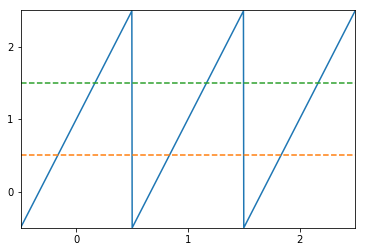

In [29]:
xvals = np.linspace(0.,1.,1e3)
yvals = [thrxmod1(xval) for xval in xvals]

hbar1 = np.ones(xvals.size)/3.
hbar2 = 2.*np.ones(xvals.size)/3.

plt.plot(xvals,yvals)
plt.plot(xvals,hbar1,ls='--')
plt.plot(xvals,hbar2,ls='--')
plt.xticks((1./6.,.5,5./6.),("0","1","2"))
plt.yticks((1./6.,.5,5./6.),("0","1","2"))
plt.xlim(0.,1.)
plt.ylim(0.,1.)

Now, let's tie this all together.  To do this, associate with the subinterval $[0,1/3)$ the symbol $0$, the subinterval $[1/3,2/3)$ the symbol $1$, and the subinterval $[2/3,1]$ the symbol $2$.  Note, if you are thinking of the symbols as the coefficients $t_{j}$ from above, good, you should be.  Now, choose $x_{0}\in[0,1]$.  Per our convention, it must start in one of the three intervals, and thus we can associate a symbol with it.  Say $x_{0}=1/5$.  Then it starts with a $0$.  Now, for $x_{0}=1/5$, 

$$
C_{3,1}(x_{0}) = 3/5 \in [1/3,2/3), 
$$

and thus $C_{3,1}(x_{0})$ lands in a $1$ interval.  We describe the _ itinerary _ of $x_{0}$ via the sequence of symbols $(0,1)$.  Another iteration of our mapping gives us 

$$
C_{3,1}^{(2)}(x_{0}) = \frac{9}{5}~ \mbox{mod} 1 = \frac{4}{5} \in [2/3,1].
$$

Thus, the next term in the itinerary is a $2$, and our itinerary thus far is $(0,1,2)$.  If we repeat this again, we get 

$$
C_{3,1}^{(3)}(x_{0}) = \frac{12}{5}~ \mbox{mod} 1 = \frac{2}{5} \in [1/3,2/3).
$$

and we update our itinerary to be $(0,1,2,1)$.  Now, just to touch base, let's note that 

In [30]:
print 1./5.
print (1./9. + 2./27. + 1./81.)

0.2
0.197530864198


And so we see that the itinerary we generate under repeated applications of the circle map is in fact the ternary expansion of $x_{0}$.  So what we are trying to exploit here is that the circle map $C_{3,1}(x)$ on $[0,1]$ is able to map any symbol to any other symbol, i.e. 

\begin{align}
0 \rightarrow & 0,1,2\\
1 \rightarrow & 0,1,2\\
2 \rightarrow & 0,1,2
\end{align}

_ Problem _: Show that for $x_{0}\in[0,1]$ that the itinerary generated by the circle map $C_{3,1}(x)$ is the same as the coefficients of the ternary expansion for $x$.   

And now that you understand that, you can do this...

_ Problem _: By modifying the circle map $C_{3,1}(x)$, show that the elements of the Cantor set $\mathcal{C}$ are those that elements with itineraries/ternary expansions with only the symbols $0$ and $2$.

Now, once we believe that the Cantor set really is the set of all itineraries consisting of only $0$ and $2$, we are ready to show that $\mathcal{C}$ is uncountable.  Denote this set as $\mathcal{S}$ where 

$$
\mathcal{S} = \left\{(s_{1},s_{2},\cdots), ~ s_{j} = 0,2 \right\}
$$

The set $\mathcal{S}$ is called a symbol space.  We will think a lot about symbol spaces throughout the remainder of the semester.  

Now clearly $\mathcal{C}$ has an infinite number of elements.  But to show that it is uncountable, we use a now classic argument from Cantor himself that goes as follows.  Suppose we could list out every infinite sequence of $0$ and $2$, one after another in a countable fashion as in the following picture

$$
\begin{array}{c|cccc}
n=1 & 0 & 0 & 0 & \cdots \\
n=2 & 2 & 0 & 0 & \cdots \\
\vdots & & & & 
\end{array}
$$

So this would almost seem to be fine, but then Cantor, genius that he was, had a wicked thought.  From the table above, if we move along the diagonal we can generate a sequence such that if we have a $0$ in the diagonal of the table, we put a $2$ in our new sequence and vice versa.  Then, if we repeat this process along the length of the table, we see that we must necessarily generate a sequence that cannot possibly have been in our enumerated list of sequences.  And even if we included our new sequence in our original list of sequences, we could just repeat the process we just described, and so forth.  Thus $\mathcal{S}$ is uncountable.  

So what we see now is that the circle map $C_{3,1}(x)$ can do some pretty funky stuff.  On the one hand, it can behave in a really simple way.  For example, we can show it has three fixed points on $[0,1]$, i.e. points such that 

$$
C_{3,1}(x_{\ast}) = x_{\ast}.  
$$

These are $x_{\ast}=0,1$, and $3(x_{\ast}-1/3) = x_{\ast}$, or $x_{\ast}=1/2$.  So, if a point is a fixed point, then under iteration, it doesn't go anywhere.  In other words

$$
C^{(n)}_{3,1}(x_{\ast}) = x_{\ast}.  
$$

This is reflected in the itineraries of the fixed points, which are clearly

\begin{align}
0 = & \left(0,0,0,0,\cdots \right)\\
\frac{1}{2} = & \left(1,1,1,1,\cdots \right)\\
1 = & \left(2,2,2,2,\cdots \right)
\end{align}

Using itineraries, we can then readily find the 2-cycles of $C_{3,1}(x)$.  By a 2-cycle, or period 2-cycle, we mean two points $p$ and $q$ such that 

$$
C_{3,1}(p) = q, ~ C_{3,1}(q) = p.
$$

_ Problem _: Using itineraries, find the three 2-cycles, or six points total, that do not correspond to fixed points.  

So okay, 2-cycles are only a little more complicated than fixed points, but we can easily explain what happens to them as we continue to iterate the circle map.  